<a href="https://colab.research.google.com/github/NicolasFG/Proyecto4-Deep-Learning-CNN/blob/main/Proyecto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import tqdm.notebook as tqdm
from google.colab import drive
import math

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
dataset_dir = "./drive/MyDrive/COVID-19_Radiography_Dataset"
test_size = 0.2
val_size = 0.1
batch_size = 32

trans = transforms.Compose([transforms.Grayscale(), transforms.Resize(255), transforms.ToTensor(),transforms.Normalize((0.5), (0.5))])

dataset = datasets.ImageFolder(dataset_dir, transform = trans)
n_test = int(np.floor(test_size * len(dataset)))
n_val = int(np.floor(val_size * len(dataset)))
n_train = len(dataset) - n_test - n_val

In [ ]:
train_set, test_set, val_set = torch.utils.data.random_split(dataset,[n_train, n_test, n_val])
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_set , batch_size=batch_size, shuffle=False, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_set , batch_size=batch_size, shuffle=False, pin_memory=True)





Tamaño dataset:  21175
Tamaño train set:  14823
Tamaño test set:  4235
Tamaño val set:  2117
Tamaño batch train:  464
Tamaño batch test:  133
Tamaño batch val:  67
Clases detectadas:  {'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}


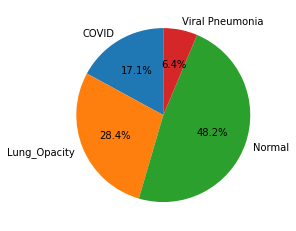

In [ ]:
print("Tamaño dataset: ",len(dataset))
print("Tamaño train set: ",len(train_set))
print("Tamaño test set: ",len(test_set))
print("Tamaño val set: ",len(val_set))

print("Tamaño batch train: ",len(train_loader))
print("Tamaño batch test: ",len(test_loader))
print("Tamaño batch val: ",len(val_loader))

print("Clases detectadas: ", dataset.class_to_idx)

c = dataset.targets.count(0)
l = dataset.targets.count(1)
n = dataset.targets.count(2)
v = dataset.targets.count(3)
plt.pie([c, l, n, v] , labels = dataset.classes, autopct = '%1.1f%%', startangle = 90)
plt.show() 

In [ ]:
#https://towardsdatascience.com/a-batch-too-large-finding-the-batch-size-that-fits-on-gpus-aef70902a9f1


In [ ]:
def Show_imgs(imgs, name,  size = 3, color = True):
  color_m ='jet'
  if color == False:
    color_m ='gray'
  print('******************' + name  +  '**************************')
  img_numbers = imgs.shape[0]
  rows = cols = math.ceil(np.sqrt(img_numbers))
  
  fig = plt.figure(figsize=(rows*size, cols*size))
  for i in range(0, rows*cols):
    fig.add_subplot(rows, cols,i+1)
    if i<img_numbers:
      plt.imshow(imgs[i].detach(), cmap = 'gray')
  plt.show()

******************First Image**************************


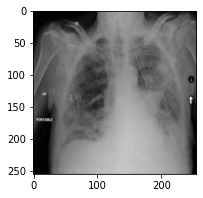

******************layer 1**************************


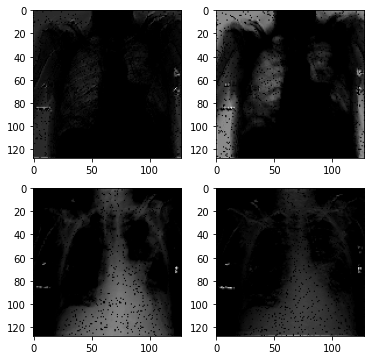

torch.Size([1, 4, 128, 128])
******************layer 2**************************


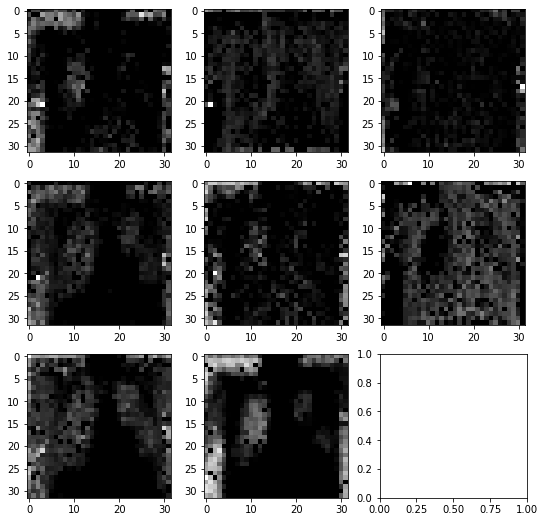

torch.Size([1, 8, 32, 32])
******************layer 3**************************


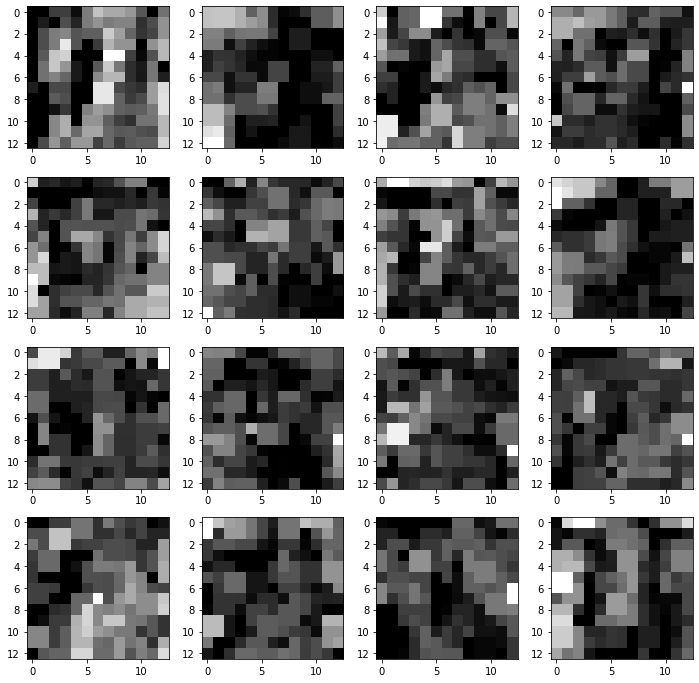

torch.Size([1, 16, 13, 13])
******************layer 4**************************


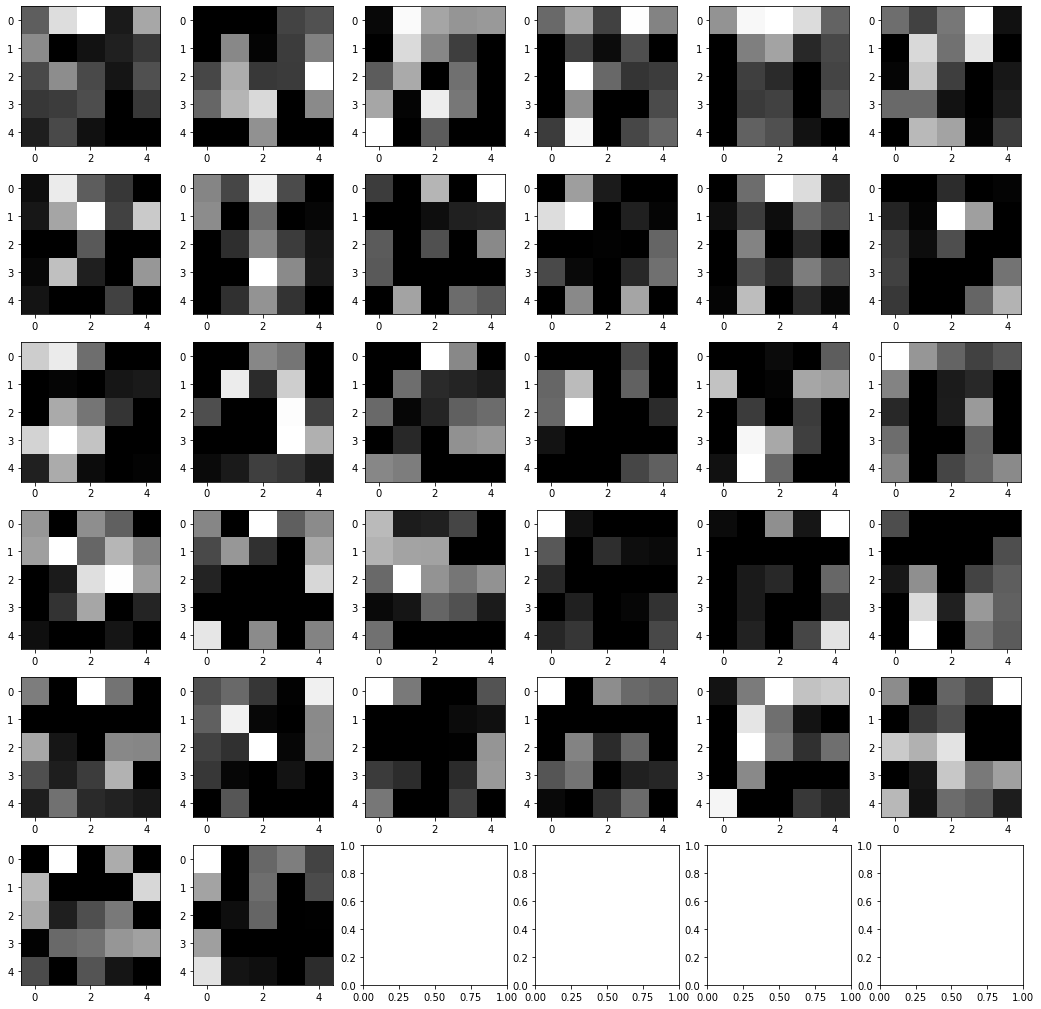

torch.Size([1, 32, 5, 5])


In [ ]:
img, label = train_set[100]
img = img.unsqueeze(0)
#[batch_size, Channel, H,W]

#Analizar lo que ocurre cuando se añade batch normalization a cada capa. DONE
#Analizar lo que ocurre cuando se añade batch normalization y Dropout a cada capa.
#Analizar que ocurre si sólo se agrega Dropout y batch normalization a la primera capa.

Show_imgs(img[0], "First Image")

layer1 = nn.Sequential(nn.Conv2d(1,4,3,1,2), nn.BatchNorm2d(4), nn.Dropout(), nn.ReLU(), nn.MaxPool2d(2,2))
layer2 = nn.Sequential(nn.Conv2d(4,8,6,1,2), nn.BatchNorm2d(8), nn.Dropout(), nn.ReLU(), nn.MaxPool2d(2,4))
layer3 = nn.Sequential(nn.Conv2d(8,16,9,1,2), nn.BatchNorm2d(16), nn.Dropout(), nn.ReLU(), nn.MaxPool2d(3,2))
layer4 = nn.Sequential(nn.Conv2d(16,32,7,1,2), nn.BatchNorm2d(32), nn.Dropout(), nn.ReLU(), nn.MaxPool2d(2,2))

out = layer1(img)
Show_imgs(out[0], "layer 1")
print(out.shape)

out2 = layer2(out)
Show_imgs(out2[0], "layer 2")
print(out2.shape)

out3 = layer3(out2)
Show_imgs(out3[0], "layer 3")
print(out3.shape)

out4 = layer4(out3)
Show_imgs(out4[0], "layer 4")
print(out4.shape)


In [ ]:
num_classes = 4
learning_rate = 0.001
num_epochs = 15

In [ ]:
class CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1,4,3,1,2), nn.BatchNorm2d(4),nn.Dropout(), nn.ReLU(), nn.MaxPool2d(2,2))
        self.layer2 = nn.Sequential(nn.Conv2d(4,8,6,1,2), nn.BatchNorm2d(8),nn.Dropout(),nn.ReLU(), nn.MaxPool2d(2,4))
        self.layer3 = nn.Sequential(nn.Conv2d(8,16,9,1,2), nn.BatchNorm2d(16),nn.Dropout(), nn.ReLU(), nn.MaxPool2d(3,2))
        self.layer4 = nn.Sequential(nn.Conv2d(16,32,7,1,2), nn.BatchNorm2d(32),nn.Dropout(),nn.ReLU(), nn.MaxPool2d(2,2))
        self.fc = nn.Linear(5*5*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out


In [ ]:
model         = CNN(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)
print([ e.shape  for e in model.fc.parameters()])

model.fc.weight

[torch.Size([4, 800]), torch.Size([4])]


Parameter containing:
tensor([[-0.0185,  0.0175, -0.0282,  ...,  0.0231, -0.0175, -0.0259],
        [-0.0016, -0.0294, -0.0027,  ...,  0.0106, -0.0006,  0.0198],
        [ 0.0101,  0.0308,  0.0307,  ..., -0.0062,  0.0020,  0.0281],
        [-0.0096,  0.0007, -0.0147,  ...,  0.0261, -0.0223, -0.0322]],
       device='cuda:0', requires_grad=True)

In [ ]:
def validation():
  current_val_loss = 0
  with torch.no_grad():
    for images, labels in tqdm.tqdm(val_loader, desc="Validating", leave=False):
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      loss = loss_fn(outputs, labels)
      current_val_loss += loss.item()
  return current_val_loss / len(val_loader)

In [ ]:
def train(model, optimizer, loss_fn, num_epochs, early_stop,validation_loader,earlystop):
  total_step = len(train_loader)
  list_loss = []
  val_loss = []

  
  ul_val_loss = 1000

  for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch+1, num_epochs))
    current_loss = 0
    for i, (images, labels) in enumerate(tqdm.tqdm(train_loader, desc="Training", leave=False)):
      images = images.to(device)
      labels = labels.to(device)
      output = model(images)
      loss = loss_fn(output, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      current_loss += loss.item()
              
      if (i+1) % 117 == 0:
        print ('Step [{}/{}], Loss: {:.4f}'.format(i+1, total_step, loss.item()))

    list_loss.append(current_loss/total_step)
    val_loss.append(validation())
    current_val_loss = validation()

    if earlystop is True:
        ul_val_loss = EarlyStopping(model,current_val_loss,ul_val_loss)

  print('Finished Training Trainset')
  return list_loss, val_loss

In [ ]:
def testing():
  cc = []
  tt = []
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm.tqdm(test_loader, desc="Testing", leave=False):
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images) 
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      tt.append(total)
      correct += (predicted == labels).sum().item()
      cc.append(correct)
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_set), 100 * correct / total))
  return cc, tt


In [ ]:
contador=0
def EarlyStopping(modelo, current_val_loss, ul_val_loss):
    global contador
    patience = 10
    print('The current loss:', current_val_loss)
    print('Last val loss:', ul_val_loss)
    if current_val_loss > ul_val_loss:
        contador = contador + 1
        print('Contador:', contador)
        if contador >= patience:
            return modelo
    else:
        print('Contador: 0')
        trigger_times = 0
    return current_val_loss



In [ ]:
list_loss, val_loss = train(model, optimizer, loss_fn, num_epochs,train_loader,val_loader,True)

Epoch 1/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.6169
Step [234/464], Loss: 0.5796
Step [351/464], Loss: 0.5330


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.537219775256826
Last val loss: 100
trigger times: 0
Epoch 2/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.5208
Step [234/464], Loss: 0.3939
Step [351/464], Loss: 0.1462


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.439255593872782
Last val loss: 0.537219775256826
trigger times: 0
Epoch 3/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.2415
Step [234/464], Loss: 0.2721
Step [351/464], Loss: 0.3628


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.38464455128605685
Last val loss: 0.439255593872782
trigger times: 0
Epoch 4/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.2163
Step [234/464], Loss: 0.1690
Step [351/464], Loss: 0.2310


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.4192201966670022
Last val loss: 0.38464455128605685
trigger times: 1
Epoch 5/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.2401
Step [234/464], Loss: 0.1858
Step [351/464], Loss: 0.3712


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.35555586919410903
Last val loss: 0.4192201966670022
trigger times: 0
Epoch 6/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.2492
Step [234/464], Loss: 0.4100
Step [351/464], Loss: 0.2583


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.3668488604364111
Last val loss: 0.35555586919410903
trigger times: 1
Epoch 7/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.1521
Step [234/464], Loss: 0.1679
Step [351/464], Loss: 0.5213


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.35412459987313
Last val loss: 0.3668488604364111
trigger times: 0
Epoch 8/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.4551
Step [234/464], Loss: 0.2767
Step [351/464], Loss: 0.2831


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.3761387823232964
Last val loss: 0.35412459987313
trigger times: 1
Epoch 9/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.4593
Step [234/464], Loss: 0.2962
Step [351/464], Loss: 0.3073


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.40732539823250985
Last val loss: 0.3761387823232964
trigger times: 2
Epoch 10/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.2757
Step [234/464], Loss: 0.5097
Step [351/464], Loss: 0.3745


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.32613478890105857
Last val loss: 0.40732539823250985
trigger times: 0
Epoch 11/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.1772
Step [234/464], Loss: 0.1590
Step [351/464], Loss: 0.2238


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.34298134394990865
Last val loss: 0.32613478890105857
trigger times: 1
Epoch 12/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.1451
Step [234/464], Loss: 0.1725
Step [351/464], Loss: 0.2314


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.33500016625247786
Last val loss: 0.34298134394990865
trigger times: 0
Epoch 13/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.1253
Step [234/464], Loss: 0.2663
Step [351/464], Loss: 0.2684


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.34104582845275083
Last val loss: 0.33500016625247786
trigger times: 1
Epoch 14/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.4006
Step [234/464], Loss: 0.0971
Step [351/464], Loss: 0.1475


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.34668437858570866
Last val loss: 0.34104582845275083
trigger times: 2
Epoch 15/15


Training:   0%|          | 0/464 [00:00<?, ?it/s]

Step [117/464], Loss: 0.0921
Step [234/464], Loss: 0.2052
Step [351/464], Loss: 0.1995


Validating:   0%|          | 0/67 [00:00<?, ?it/s]

Validating:   0%|          | 0/67 [00:00<?, ?it/s]

The current loss: 0.35688425355882786
Last val loss: 0.34668437858570866
trigger times: 3
Finished Training Trainset


In [ ]:
cc, tt = testing()

Testing:   0%|          | 0/133 [00:00<?, ?it/s]

In [ ]:
print(len(list_loss), len(val_loss))

15 15


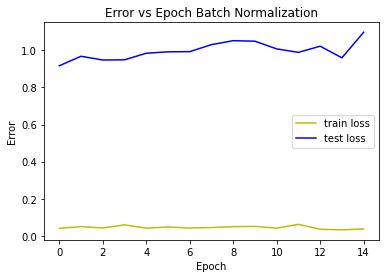

In [ ]:
fig, ax = plt.subplots()
ax.plot(list_loss, 'y', label = 'train loss')
ax.plot(val_loss, 'b', label = 'test loss')
plt.title("Error vs Epoch Batch Normalization")
plt.xlabel("Epoch")
plt.ylabel("Error")
ax.legend()

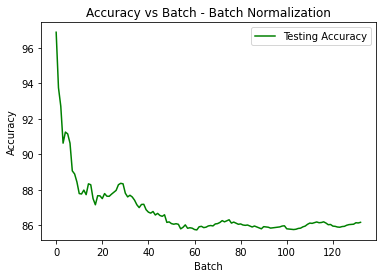

In [ ]:
ttt = []
for i in range(0,len(cc)):
  ttt.append(100 * cc[i] / tt[i])

fig, ax = plt.subplots()
ax.plot(ttt, 'g', label = 'Testing Accuracy')
plt.title("Accuracy vs Batch - Batch Normalization")
plt.xlabel("Batch")
plt.ylabel("Accuracy")
ax.legend()